**1.1 Answer the following questions:**

**1.   Explain the indication of overfitting and how this occurs (provide plot supporting your answer)? [+4 answer, +4 plot, +2 answer and plot agree]**

If our model does much better on the training set than on the test set, then we’re likely overfitting.
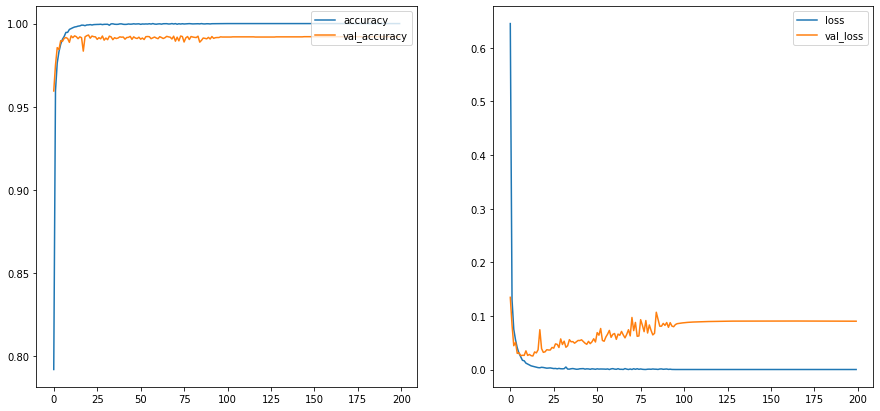
If the algorithm is too complex or flexible (e.g. it has too many input features or it’s not properly regularized), it can end up “memorizing the training dataset” instead of finding the features.

This overfit model will then make predictions based on that relationship between input and labels in training dataset. It will perform unusually well on its training data… yet very poorly on new test dataset.

**2.   Explain how overfit can hinder performance of a model when deployed. [+6 answer]**
Overfitting is a term used in statistics that refers to a modeling error that occurs when a function corresponds too closely to a particular set of data. As a result, overfitting may fail to fit additional data, and this may affect the accuracy of predicting future observations.

**3.   Name two ways to avoid this. [+2 answer, +2 answer]**
1. Training with more data
One of the ways to prevent overfitting is by training with more data. Such an option makes it easy for algorithms to detect the signal better to minimize errors. As the user feeds more training data into the model, it will be unable to overfit all the samples and will be forced to generalize to obtain results.

Users should continually collect more data as a way of increasing the accuracy of the model. However, this method is considered expensive, and, therefore, users should ensure that the data being used is relevant and clean.

 

2. Data augmentation
An alternative to training with more data is data augmentation, which is less expensive compared to the former. If you are unable to continually collect more data, you can make the available data sets appear diverse. Data augmentation makes a sample data look slightly different every time it is processed by the model. The process makes each data set appear unique to the model and prevents the model from learning the characteristics of the data sets.

Another option that works in the same way as data augmentation is adding noise to the input and output data. Adding noise to the input makes the model become stable, without affecting data quality and privacy, while adding noise to the output makes the data more diverse. However, noise addition should be done with moderation so that the extent of the noise is not so much as to make the data incorrect or too different.

 

3. Data Simplification
Overfitting can occur due to the complexity of a model, such that, even with large volumes of data, the model still manages to overfit the training dataset. The data simplification method is used to reduce overfitting by decreasing the complexity of the model to make it simple enough that it does not overfit.

Some of the actions that can be implemented include pruning a decision tree, reducing the number of parameters in a neural network, and using dropout on a neutral network. Simplifying the model can also make the model lighter and run faster.

 

4. Ensembling
Ensembling is a machine learning technique that works by combining predictions from two or more separate models. The most popular ensembling methods include boosting and bagging. Boosting works by using simple base models to increase their aggregate complexity. It trains a large number of weak learners arranged in a sequence, such that each learner in the sequence learns from the mistakes of the learner before it.

Boosting combines all the weak learners in the sequence to bring out one strong learner. The other ensembling method is bagging, which is the opposite of boosting. Bagging works by training a large number of strong learners arranged in a parallel pattern and then combining them to optimize their predictions.

**1.2 Answer the following question:** 

**1.   Explain how dropout affected your loss (provide plot supporting your answer). [+5 answer, +5 plot]**

A single model can be used to simulate having a large number of different network architectures by randomly dropping out nodes during training. This is called dropout and offers a very computationally cheap and remarkably effective regularization method to reduce overfitting and improve generalization error in deep neural networks of all kinds.Dropout equivalent to regularized Network

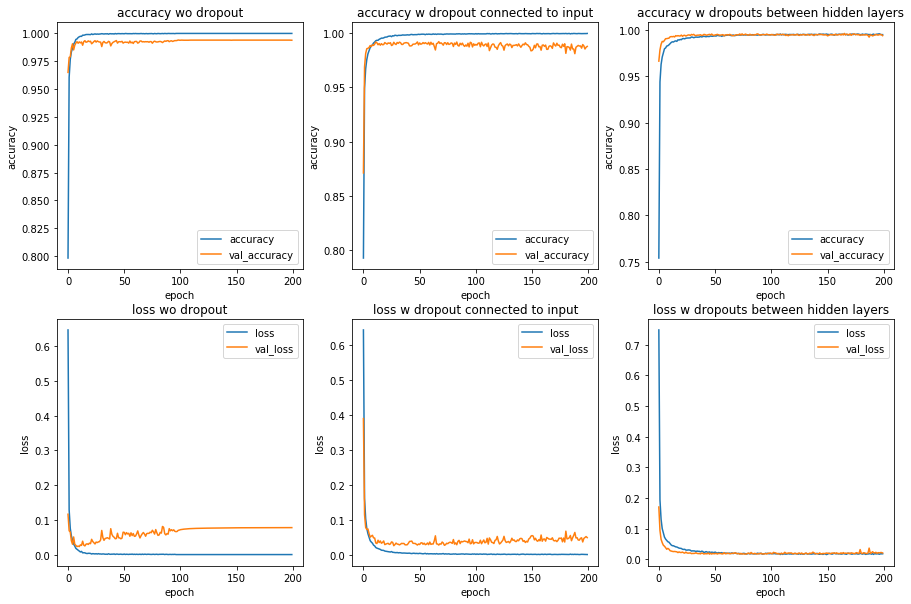

**2.1 Linear AE points for constructed model, no questions here.**

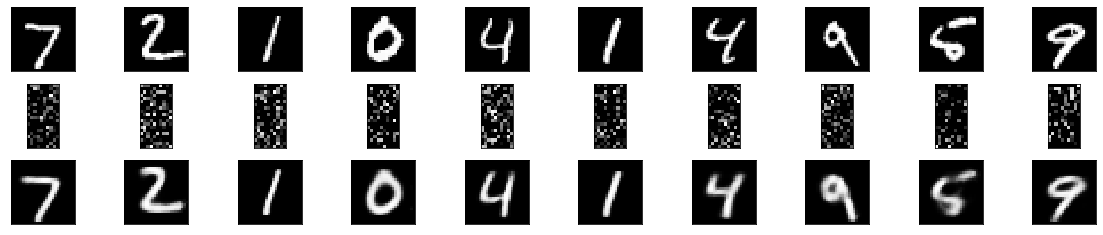

**2.2 Convolutional AE points for constructed model, no questions here.**
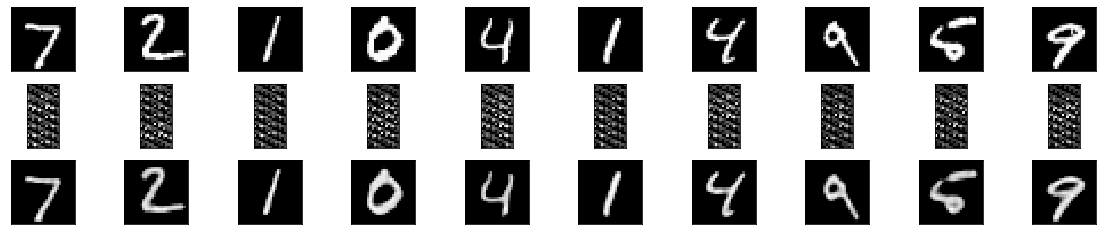

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
import pickle

In [2]:
# Check that TF 2.1.0 is in use
print(tf.__version__)

2.1.0


In [3]:
#Import dataset and normalize to [0,1]
mnist = tf.keras.datasets.mnist
(data_train, labels_train), (data_test, labels_test) = mnist.load_data()
#Normalize
data_train = data_train / 255
data_test = data_test /255
#Reshape
data_train = data_train.reshape(data_train.shape[0], 28, 28, 1)
data_test = data_test.reshape(data_test.shape[0], 28, 28, 1)

#Create labels as one-hot vectors
labels_train = tf.keras.utils.to_categorical(labels_train, num_classes=10)
labels_test = tf.keras.utils.to_categorical(labels_test, num_classes=10)

## 1.1 Overfitting 

In [47]:
#Create and train model architecture
def CNN_overfit():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = tf.keras.models.Sequential()

    #### Fill in Model ####
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3, 3),activation='relu', input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Conv2D(128 , (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    
    return model

CNN_overfit = CNN_overfit()
print(CNN_overfit.summary())
CNN_overfit.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history_overfit = CNN_overfit.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1000, shuffle=True)
scores = CNN_overfit.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores[1]*100))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 26, 26, 256)       2560      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 11, 11, 128)       295040    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 100)               320100    
_________________________________________________________________
dense_25 (Dense)             (None, 100)             

60000/60000 [==============================] - 5s 89us/sample - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0613 - val_accuracy: 0.9913
Epoch 46/200
60000/60000 [==============================] - 5s 87us/sample - loss: 5.9616e-04 - accuracy: 0.9998 - val_loss: 0.0484 - val_accuracy: 0.9925
Epoch 47/200
60000/60000 [==============================] - 5s 88us/sample - loss: 9.5454e-04 - accuracy: 0.9998 - val_loss: 0.0480 - val_accuracy: 0.9926
Epoch 48/200
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0454 - val_accuracy: 0.9924
Epoch 49/200
60000/60000 [==============================] - 5s 86us/sample - loss: 5.2600e-04 - accuracy: 0.9998 - val_loss: 0.0473 - val_accuracy: 0.9929
Epoch 50/200
60000/60000 [==============================] - 5s 86us/sample - loss: 5.8073e-04 - accuracy: 0.9998 - val_loss: 0.0644 - val_accuracy: 0.9913
Epoch 51/200
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0015 -

60000/60000 [==============================] - 6s 92us/sample - loss: 8.7037e-08 - accuracy: 1.0000 - val_loss: 0.0665 - val_accuracy: 0.9937
Epoch 99/200
60000/60000 [==============================] - 6s 95us/sample - loss: 9.3400e-09 - accuracy: 1.0000 - val_loss: 0.0697 - val_accuracy: 0.9941
Epoch 100/200
60000/60000 [==============================] - 6s 92us/sample - loss: 3.1054e-09 - accuracy: 1.0000 - val_loss: 0.0705 - val_accuracy: 0.9939
Epoch 101/200
60000/60000 [==============================] - 6s 92us/sample - loss: 1.7345e-09 - accuracy: 1.0000 - val_loss: 0.0717 - val_accuracy: 0.9939
Epoch 102/200
60000/60000 [==============================] - 6s 92us/sample - loss: 1.2636e-09 - accuracy: 1.0000 - val_loss: 0.0722 - val_accuracy: 0.9940
Epoch 103/200
60000/60000 [==============================] - 5s 86us/sample - loss: 9.8944e-10 - accuracy: 1.0000 - val_loss: 0.0727 - val_accuracy: 0.9939
Epoch 104/200
60000/60000 [==============================] - 5s 86us/sample - l

60000/60000 [==============================] - 5s 88us/sample - loss: 7.5499e-11 - accuracy: 1.0000 - val_loss: 0.0770 - val_accuracy: 0.9940
Epoch 151/200
60000/60000 [==============================] - 5s 86us/sample - loss: 7.5499e-11 - accuracy: 1.0000 - val_loss: 0.0771 - val_accuracy: 0.9940
Epoch 152/200
60000/60000 [==============================] - 5s 87us/sample - loss: 6.7552e-11 - accuracy: 1.0000 - val_loss: 0.0771 - val_accuracy: 0.9940
Epoch 153/200
60000/60000 [==============================] - 5s 86us/sample - loss: 6.5565e-11 - accuracy: 1.0000 - val_loss: 0.0771 - val_accuracy: 0.9940
Epoch 154/200
60000/60000 [==============================] - 5s 89us/sample - loss: 6.9539e-11 - accuracy: 1.0000 - val_loss: 0.0771 - val_accuracy: 0.9940
Epoch 155/200
60000/60000 [==============================] - 5s 90us/sample - loss: 5.9605e-11 - accuracy: 1.0000 - val_loss: 0.0771 - val_accuracy: 0.9940
Epoch 156/200
60000/60000 [==============================] - 5s 90us/sample - 

In [48]:
# Information contained in history dict.
print(history_overfit.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0, 0.5, 'loss')

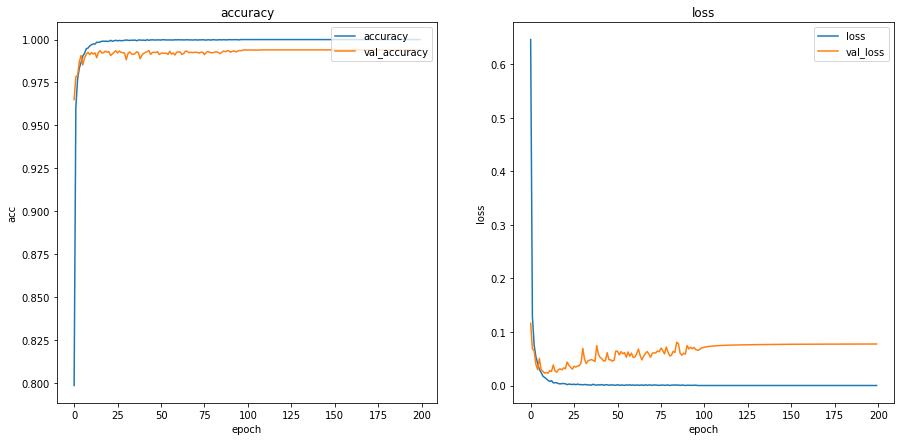

In [49]:
#Plot accuracy vs epoch
#acc scores = 99.39%
plt.figure(figsize=(15,7))
plt.subplot(121)
#### Fill in plot ####
plt.plot(history_overfit.history['accuracy'], label='accuracy')
plt.plot(history_overfit.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='upper right')
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

#Plot loss vs epoch
plt.subplot(122)
plt.plot(history_overfit.history['loss'],label='loss')
plt.plot(history_overfit.history['val_loss'],label='val_loss')
plt.legend(loc='upper right')
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
#### Fill in plot ####


In [4]:
#Create and train model architecture
def CNN_dropout_hidden():
    model = tf.keras.models.Sequential()
    #### Fill in model ####
    model.add(tf.keras.layers.Input(shape=(28, 28, 1)))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3, 3),activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Conv2D(128 , (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    return model

#Compile and train the model
CNN_dropout_hidden = CNN_dropout_hidden()
CNN_dropout_hidden.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history_dropout_hidden = CNN_dropout_hidden.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1000, shuffle=True)
scores_dropout_hidden = CNN_dropout_hidden.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores_dropout_hidden[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 9s 154us/sample - loss: 0.6432 - accuracy: 0.7929 - val_loss: 0.3897 - val_accuracy: 0.8713
Epoch 2/200
60000/60000 [==============================] - 5s 87us/sample - loss: 0.1617 - accuracy: 0.9493 - val_loss: 0.1149 - val_accuracy: 0.9690
Epoch 3/200
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1034 - accuracy: 0.9673 - val_loss: 0.0782 - val_accuracy: 0.9813
Epoch 4/200
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0755 - accuracy: 0.9757 - val_loss: 0.0729 - val_accuracy: 0.9857
Epoch 5/200
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0607 - accuracy: 0.9809 - val_loss: 0.0741 - val_accuracy: 0.9860
Epoch 6/200
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0504 - accuracy: 0.9837 - val_loss: 0.0611 - val_accuracy: 0.9868
Epoch 7/200
60000/60000 [========================

Epoch 55/200
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.0335 - val_accuracy: 0.9904
Epoch 56/200
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.0293 - val_accuracy: 0.9912
Epoch 57/200
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0305 - val_accuracy: 0.9905
Epoch 58/200
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0340 - val_accuracy: 0.9900
Epoch 59/200
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0292 - val_accuracy: 0.9915
Epoch 60/200
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.0367 - val_accuracy: 0.9891
Epoch 61/200
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0033 - ac

60000/60000 [==============================] - 5s 87us/sample - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.0346 - val_accuracy: 0.9895
Epoch 110/200
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0362 - val_accuracy: 0.9901
Epoch 111/200
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0474 - val_accuracy: 0.9877
Epoch 112/200
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0308 - val_accuracy: 0.9909
Epoch 113/200
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0485 - val_accuracy: 0.9839
Epoch 114/200
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0435 - val_accuracy: 0.9865
Epoch 115/200
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0023 - accuracy:

Epoch 163/200
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0394 - val_accuracy: 0.9890
Epoch 164/200
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0498 - val_accuracy: 0.9851
Epoch 165/200
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0477 - val_accuracy: 0.9851
Epoch 166/200
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0453 - val_accuracy: 0.9878
Epoch 167/200
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0451 - val_accuracy: 0.9884
Epoch 168/200
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.0445 - val_accuracy: 0.9878
Epoch 169/200
60000/60000 [==============================] - 5s 90us/sample - loss: 0.00

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0, 0.5, 'loss')

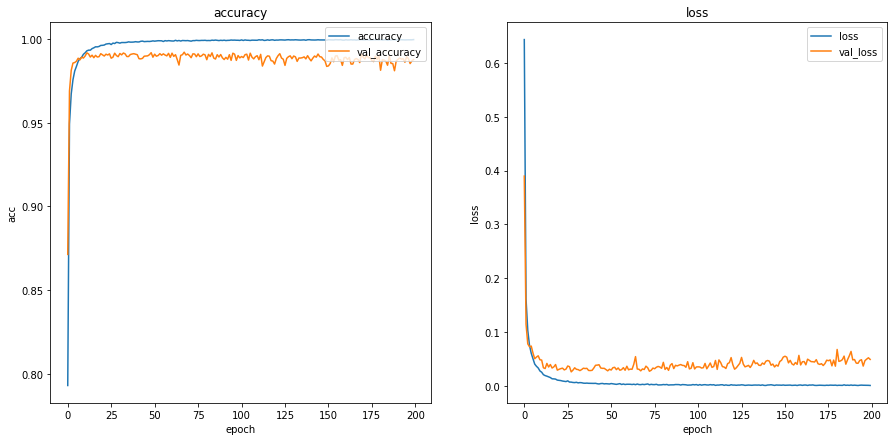

In [5]:
# Information contained in history dict. 98.78%
print(history_dropout_hidden.history.keys())
plt.figure(figsize=(15,7))
plt.subplot(121)
#### Fill in plot ####
plt.plot(history_dropout_hidden.history['accuracy'], label='accuracy')
plt.plot(history_dropout_hidden.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='upper right')
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

#Plot loss vs epoch
plt.subplot(122)
plt.plot(history_dropout_hidden.history['loss'],label='loss')
plt.plot(history_dropout_hidden.history['val_loss'],label='val_loss')
plt.legend(loc='upper right')
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
#### Fill in plot ####

In [6]:
#Create and train model architecture
def CNN_dropout_hidden2():
    model = tf.keras.models.Sequential()
    #### Fill in model ####
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3, 3),activation='relu', input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Conv2D(128 , (3, 3), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    return model

#Compile and train the model
CNN_dropout_hidden2 = CNN_dropout_hidden2()
CNN_dropout_hidden2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history_dropout_hidden2 = CNN_dropout_hidden2.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1000, shuffle=True)
scores_dropout_hidden2 = CNN_dropout_hidden2.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores_dropout_hidden2[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 10s 169us/sample - loss: 0.7477 - accuracy: 0.7538 - val_loss: 0.1702 - val_accuracy: 0.9663
Epoch 2/200
60000/60000 [==============================] - 9s 154us/sample - loss: 0.1934 - accuracy: 0.9439 - val_loss: 0.0939 - val_accuracy: 0.9784
Epoch 3/200
60000/60000 [==============================] - 10s 163us/sample - loss: 0.1298 - accuracy: 0.9627 - val_loss: 0.0650 - val_accuracy: 0.9845
Epoch 4/200
60000/60000 [==============================] - 10s 169us/sample - loss: 0.0998 - accuracy: 0.9707 - val_loss: 0.0540 - val_accuracy: 0.9876
Epoch 5/200
60000/60000 [==============================] - 10s 161us/sample - loss: 0.0855 - accuracy: 0.9750 - val_loss: 0.0457 - val_accuracy: 0.9872
Epoch 6/200
60000/60000 [==============================] - 9s 155us/sample - loss: 0.0722 - accuracy: 0.9796 - val_loss: 0.0424 - val_accuracy: 0.9887
Epoch 7/200
60000/60000 [===============

60000/60000 [==============================] - 10s 165us/sample - loss: 0.0216 - accuracy: 0.9939 - val_loss: 0.0187 - val_accuracy: 0.9947
Epoch 55/200
60000/60000 [==============================] - 10s 160us/sample - loss: 0.0210 - accuracy: 0.9936 - val_loss: 0.0187 - val_accuracy: 0.9944
Epoch 56/200
60000/60000 [==============================] - 9s 156us/sample - loss: 0.0208 - accuracy: 0.9937 - val_loss: 0.0185 - val_accuracy: 0.9944
Epoch 57/200
60000/60000 [==============================] - 9s 156us/sample - loss: 0.0215 - accuracy: 0.9931 - val_loss: 0.0175 - val_accuracy: 0.9946
Epoch 58/200
60000/60000 [==============================] - 9s 156us/sample - loss: 0.0189 - accuracy: 0.9939 - val_loss: 0.0174 - val_accuracy: 0.9949
Epoch 59/200
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.0214 - val_accuracy: 0.9936
Epoch 60/200
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0201 - accura

Epoch 108/200
60000/60000 [==============================] - 10s 159us/sample - loss: 0.0188 - accuracy: 0.9947 - val_loss: 0.0167 - val_accuracy: 0.9951
Epoch 109/200
60000/60000 [==============================] - 9s 156us/sample - loss: 0.0153 - accuracy: 0.9956 - val_loss: 0.0176 - val_accuracy: 0.9950
Epoch 110/200
60000/60000 [==============================] - 10s 161us/sample - loss: 0.0187 - accuracy: 0.9946 - val_loss: 0.0197 - val_accuracy: 0.9949
Epoch 111/200
60000/60000 [==============================] - 9s 156us/sample - loss: 0.0157 - accuracy: 0.9952 - val_loss: 0.0175 - val_accuracy: 0.9950
Epoch 112/200
60000/60000 [==============================] - 10s 162us/sample - loss: 0.0175 - accuracy: 0.9947 - val_loss: 0.0190 - val_accuracy: 0.9952
Epoch 113/200
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0172 - accuracy: 0.9952 - val_loss: 0.0225 - val_accuracy: 0.9946
Epoch 114/200
60000/60000 [==============================] - 9s 154us/sample - 

60000/60000 [==============================] - 9s 155us/sample - loss: 0.0171 - accuracy: 0.9953 - val_loss: 0.0187 - val_accuracy: 0.9949
Epoch 162/200
60000/60000 [==============================] - 9s 155us/sample - loss: 0.0181 - accuracy: 0.9952 - val_loss: 0.0182 - val_accuracy: 0.9953
Epoch 163/200
60000/60000 [==============================] - 9s 155us/sample - loss: 0.0166 - accuracy: 0.9952 - val_loss: 0.0207 - val_accuracy: 0.9945
Epoch 164/200
60000/60000 [==============================] - 9s 155us/sample - loss: 0.0172 - accuracy: 0.9953 - val_loss: 0.0183 - val_accuracy: 0.9955
Epoch 165/200
60000/60000 [==============================] - 9s 156us/sample - loss: 0.0185 - accuracy: 0.9952 - val_loss: 0.0215 - val_accuracy: 0.9946
Epoch 166/200
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0176 - accuracy: 0.9953 - val_loss: 0.0190 - val_accuracy: 0.9962
Epoch 167/200
60000/60000 [==============================] - 9s 153us/sample - loss: 0.0170 - ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


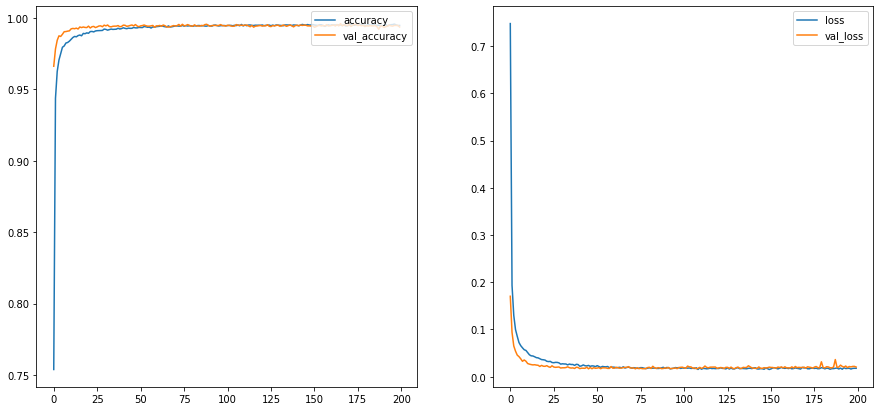

In [7]:
# Information contained in history dict.99.38%
print(history_dropout_hidden2.history.keys())
plt.figure(figsize=(15,7))
plt.subplot(121)
#### Fill in plot ####
plt.plot(history_dropout_hidden2.history['accuracy'], label='accuracy')
plt.plot(history_dropout_hidden2.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='upper right')
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
#Plot loss vs epoch
plt.subplot(122)
plt.plot(history_dropout_hidden2.history['loss'],label='loss')
plt.plot(history_dropout_hidden2.history['val_loss'],label='val_loss')
plt.legend(loc='upper right')
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
#### Fill in plot ####

Text(0, 0.5, 'loss')

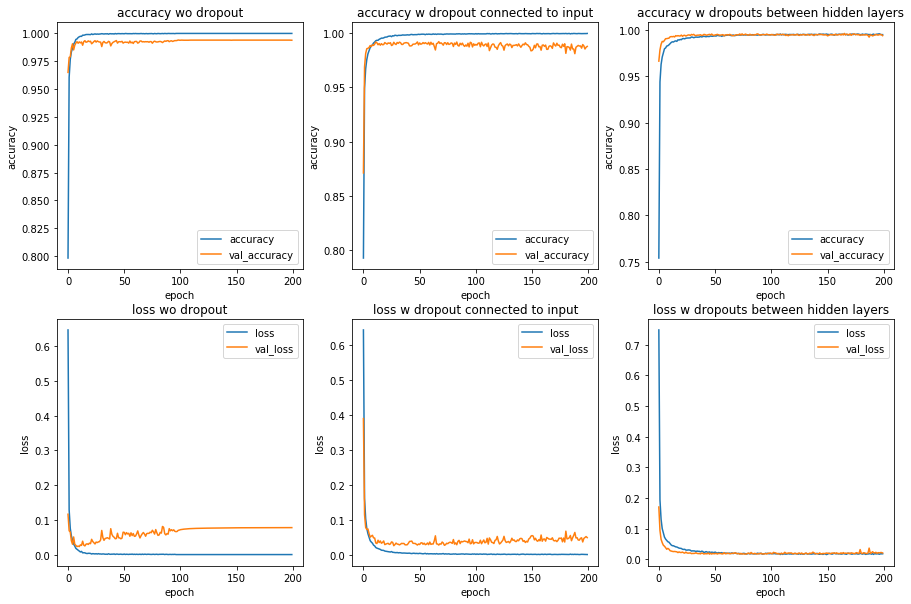

In [61]:
plt.figure(figsize=(15,10))

#### Fill in plot ####
plt.subplot(231)
plt.plot(history_overfit.history['accuracy'], label='accuracy')
plt.plot(history_overfit.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='lower right')
plt.title('accuracy wo dropout')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.subplot(232)
plt.plot(history_dropout_hidden.history['accuracy'],label='accuracy')
plt.plot(history_dropout_hidden.history['val_accuracy'],label='val_accuracy')
plt.legend(loc='lower right')
plt.title('accuracy w dropout connected to input')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.subplot(233)
plt.plot(history_dropout_hidden2.history['accuracy'],label='accuracy')
plt.plot(history_dropout_hidden2.history['val_accuracy'],label='val_accuracy')
plt.legend(loc='lower right')
plt.title('accuracy w dropouts between hidden layers')
plt.xlabel('epoch')
plt.ylabel('accuracy')
#Plot loss vs epoch
plt.subplot(234)
plt.plot(history_overfit.history['loss'], label='loss')
plt.plot(history_overfit.history['val_loss'], label='val_loss')
plt.legend(loc='upper right')
plt.title('loss wo dropout')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(235)
plt.plot(history_dropout_hidden.history['loss'],label='loss')
plt.plot(history_dropout_hidden.history['val_loss'],label='val_loss')
plt.legend(loc='upper right')
plt.title('loss w dropout connected to input')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(236)
plt.plot(history_dropout_hidden2.history['loss'],label='loss')
plt.plot(history_dropout_hidden2.history['val_loss'],label='val_loss')
plt.legend(loc='upper right')
plt.title('loss w dropouts between hidden layers')
plt.xlabel('epoch')
plt.ylabel('loss')

2.1 Linear AE

In [8]:
#Reshape training and testing data
data_train_reshape_fcae = data_train.reshape(data_train.shape[0], 784)
data_test_reshape_fcae = data_test.reshape(data_test.shape[0], 784)

In [27]:

# Create autoencoder architecture
def deep_ae():
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Input(shape=(784,)))
    # Encoder
    
    #### Fill in the model ####
    model.add(tf.keras.layers.Dense(400, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(200, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    # Decoder
    
    #### Fill in the model ####
    model.add(tf.keras.layers.Dense(200, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(400, activation='relu'))
    #model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(784, activation='sigmoid'))
    
    return model

#Create deep autoencoder graph, compile it to use mean squared error loss and the adam optimizer, train the model, create predictions
deep_ae = deep_ae()
print(deep_ae.summary())
deep_ae.compile(loss='categorical_crossentropy', optimizer='adam')
history_deep_ae = deep_ae.fit(data_train_reshape_fcae, data_train_reshape_fcae, validation_data=(data_test_reshape_fcae, data_test_reshape_fcae), epochs=150, batch_size=250, shuffle=True)
decoded_data = deep_ae.predict(data_test_reshape_fcae)

#Obtain encoder representation of data
get_hl = K.function([deep_ae.layers[0].input], [deep_ae.layers[2].output])
deep_ae_hl = get_hl([data_test_reshape_fcae])[0]

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 400)               314000    
_________________________________________________________________
dropout_27 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 200)               80200     
_________________________________________________________________
dropout_28 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_29 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 200)              

60000/60000 [==============================] - 1s 19us/sample - loss: 531.2227 - val_loss: 531.5827
Epoch 59/150
60000/60000 [==============================] - 1s 18us/sample - loss: 531.2061 - val_loss: 531.7052
Epoch 60/150
60000/60000 [==============================] - 1s 19us/sample - loss: 531.1370 - val_loss: 531.6707
Epoch 61/150
60000/60000 [==============================] - 1s 19us/sample - loss: 531.1241 - val_loss: 531.3744
Epoch 62/150
60000/60000 [==============================] - 1s 18us/sample - loss: 531.0085 - val_loss: 531.3145
Epoch 63/150
60000/60000 [==============================] - 1s 18us/sample - loss: 531.0081 - val_loss: 531.4288
Epoch 64/150
60000/60000 [==============================] - 1s 19us/sample - loss: 531.0282 - val_loss: 531.2958
Epoch 65/150
60000/60000 [==============================] - 1s 18us/sample - loss: 530.9151 - val_loss: 531.4780
Epoch 66/150
60000/60000 [==============================] - 1s 18us/sample - loss: 530.9055 - val_loss: 531.2

60000/60000 [==============================] - 1s 18us/sample - loss: 529.2707 - val_loss: 529.9833
Epoch 131/150
60000/60000 [==============================] - 1s 18us/sample - loss: 529.2436 - val_loss: 530.1501
Epoch 132/150
60000/60000 [==============================] - 1s 17us/sample - loss: 529.2732 - val_loss: 530.0045
Epoch 133/150
60000/60000 [==============================] - 1s 18us/sample - loss: 529.1869 - val_loss: 530.0426
Epoch 134/150
60000/60000 [==============================] - 1s 19us/sample - loss: 529.2024 - val_loss: 530.1640
Epoch 135/150
60000/60000 [==============================] - 1s 17us/sample - loss: 529.2034 - val_loss: 529.8620
Epoch 136/150
60000/60000 [==============================] - 1s 18us/sample - loss: 529.2350 - val_loss: 529.9500
Epoch 137/150
60000/60000 [==============================] - 1s 18us/sample - loss: 529.2106 - val_loss: 529.9623
Epoch 138/150
60000/60000 [==============================] - 1s 18us/sample - loss: 529.1644 - val_los

dict_keys(['loss', 'val_loss'])


Text(0, 0.5, 'loss')

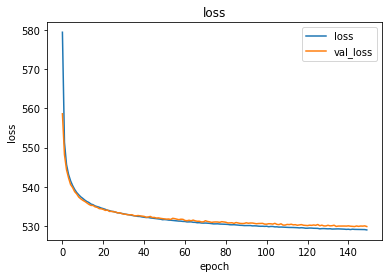

In [28]:
#Plot train/validation loss vs epoch
# Information contained in history dict.
print(history_deep_ae.history.keys())
#### Fill in plot ####



#Plot loss vs epoch
plt.plot(history_deep_ae.history['loss'],label='loss')
plt.plot(history_deep_ae.history['val_loss'],label='val_loss')
plt.legend(loc='upper right')

#### Fill in the plot ####
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')

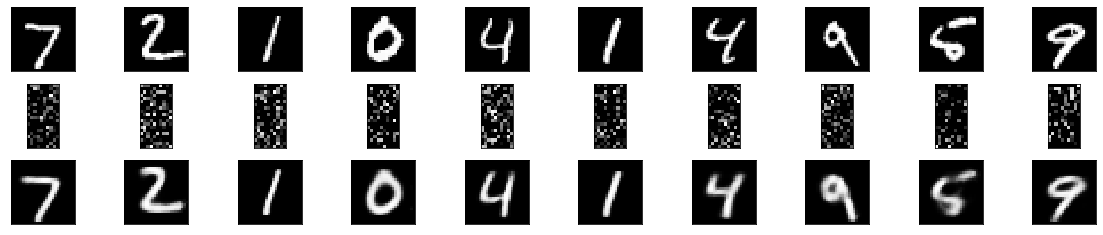

In [29]:
#Plot samples of 10 images, their hidden layer representations, and their reconstructions
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test_reshape_fcae[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    #print(deep_ae_hl[i].shape)
    plt.imshow(deep_ae_hl[i].reshape(20, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2.2 Convolutional AE 

In [43]:
#Reshape data to account for grayscale channel in each image
data_train_reshape_cae = data_train.reshape(data_train.shape[0], 28, 28, 1)
data_test_reshape_cae = data_test.reshape(data_test.shape[0], 28, 28, 1)

#Create Convolutional AutoEncoder Architecture
def cae():
    model = tf.keras.models.Sequential()
    
    #Encoder
    model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3),activation='relu', padding='same', input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(tf.keras.layers.Conv2D(8 , (3, 3), activation='relu',padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
    #### Fill in model ####
    
    #Decoder
    model.add(tf.keras.layers.Conv2D(8 , (3, 3), activation='relu',padding='same'))
    model.add(tf.keras.layers.UpSampling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(16 , (3, 3), activation='relu',padding='same'))
    model.add(tf.keras.layers.UpSampling2D((2, 2)))
    #### Fill in model ####
    model.add(tf.keras.layers.Conv2D(1 , (3, 3), activation='relu',padding='same'))
    
    return model

conv_ae = cae()
print(conv_ae.summary())

#Create deep autoencoder graph, compile it to use mean squared error loss and the adam optimizer, train the model, create predictions
conv_ae.compile(loss='mse', optimizer='adam')
history_conv_ae = conv_ae.fit(data_train_reshape_cae, data_train_reshape_cae, validation_data=(data_test_reshape_cae, data_test_reshape_cae), epochs=150, batch_size=250, shuffle=True)
decoded_data = conv_ae.predict(data_test_reshape_cae)

#Obtain encoder representation of data
get_hl = K.function([conv_ae.layers[0].input], [conv_ae.layers[3].output])
conv_ae_hl = get_hl([data_test_reshape_cae])[0]

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_14 (UpSampling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 14, 14, 16)      

60000/60000 [==============================] - 2s 28us/sample - loss: 0.0038 - val_loss: 0.0037
Epoch 62/150
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0037 - val_loss: 0.0037
Epoch 63/150
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0037 - val_loss: 0.0036
Epoch 64/150
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0037 - val_loss: 0.0037
Epoch 65/150
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0037 - val_loss: 0.0036
Epoch 66/150
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0037 - val_loss: 0.0036
Epoch 67/150
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0037 - val_loss: 0.0036
Epoch 68/150
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0037 - val_loss: 0.0037
Epoch 69/150
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0037 - val_loss: 0.0036
Epoch 70/150
60000/60000 [======

Epoch 136/150
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0035 - val_loss: 0.0036
Epoch 137/150
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0035 - val_loss: 0.0035
Epoch 138/150
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0035 - val_loss: 0.0035
Epoch 139/150
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0035 - val_loss: 0.0035
Epoch 140/150
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0035 - val_loss: 0.0035
Epoch 141/150
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0035 - val_loss: 0.0034
Epoch 142/150
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0035 - val_loss: 0.0034
Epoch 143/150
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0035 - val_loss: 0.0034
Epoch 144/150
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0035 - val_loss: 0.0035
Epoch 145/

dict_keys(['loss', 'val_loss'])


Text(0, 0.5, 'loss')

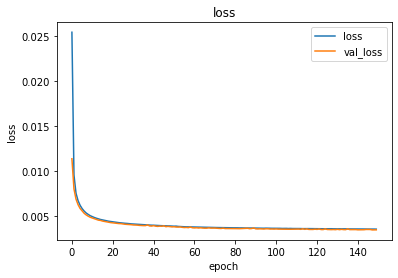

In [44]:
#Plot train/validation loss vs epoch
# Information contained in history dict.
print(history_conv_ae.history.keys())
#### Fill in plot ####
#Plot loss vs epoch
plt.plot(history_conv_ae.history['loss'],label='loss')
plt.plot(history_conv_ae.history['val_loss'],label='val_loss')
plt.legend(loc='upper right')
#### Fill in the plot #### 
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')

<Figure size 432x288 with 0 Axes>

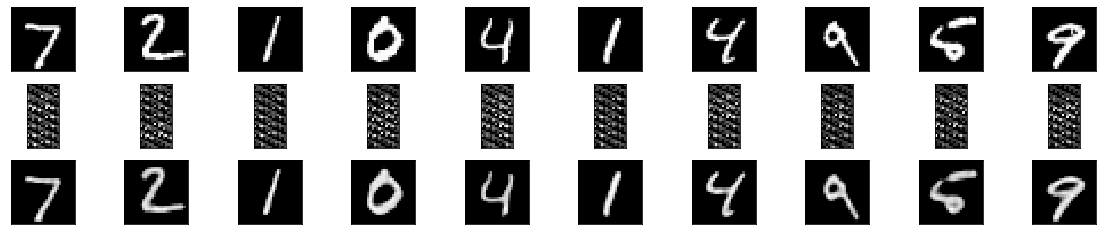

In [45]:
#Plot samples of 10 images, their hidden layer representations, and their reconstructions
n = 10  # how many digits we will display
plt.figure(3)
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test_reshape_cae[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(conv_ae_hl[i].reshape(28, 14))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()